In [2]:
import pandas as pd
import numpy as np
events = pd.read_csv('events.csv')
gold= pd.read_csv('gold.csv')
heroes = pd.read_csv('heroes.csv')
items= pd.read_csv('items.csv')
lh = pd.read_csv('lh.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
xp = pd.read_csv('xp.csv')
data_train = pd.read_csv('data_train.csv')

In [3]:
heroes_gd = pd.get_dummies(heroes, columns=['player_0','player_1','player_2','player_3',	'player_4',	'player_5','player_6','player_7','player_8','player_9'])
heroes_gd

,mid,player_0_0,player_0_1,player_0_2,player_0_3,player_0_4,player_0_5,player_0_6,player_0_7,player_0_8,...,player_9_101,player_9_102,player_9_103,player_9_104,player_9_105,player_9_106,player_9_107,player_9_108,player_9_109,player_9_110
0,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,49943,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49944,49944,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49945,49945,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49946,49946,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
xp['xp_radiant'] = xp.loc[:, 'player_0':'player_4'].sum(axis=1)
xp['xp_dire'] = xp.loc[:, 'player_5':'player_9'].sum(axis=1)
xp_team = pd.DataFrame(xp['mid'].unique(), columns=['mid'])
xp_team[['xp_radiant','xp_dire']] = xp.groupby('mid')[['xp_radiant','xp_dire']].sum()

gold['gold_radiant'] = gold.loc[:, 'player_0':'player_4'].sum(axis=1)
gold['gold_dire'] = gold.loc[:, 'player_5':'player_9'].sum(axis=1)
gold_team = pd.DataFrame(gold['mid'].unique(), columns=['mid'])
gold_team[['gold_radiant','gold_dire']] = gold.groupby('mid')[['gold_radiant','gold_dire']].sum()

items['items'] = items.loc[:, 'item_0':'item_120'].sum(axis=1)
items_team = pd.DataFrame(items['mid'].unique(), columns=['mid'])
items_team['items_all'] = items.groupby('mid')[['items']].sum()
items_team['items_radiant'] = items.loc[items['player'].astype(int) < 5].groupby('mid')['items'].sum()
items_team['items_dire'] = items.loc[items['player'].astype(int) >= 5].groupby('mid')['items'].sum()
items_team.drop('items_all', axis=1, inplace=True)

lh['lh_radiant'] = lh.loc[:, 'player_0':'player_4'].sum(axis=1)
lh['lh_dire'] = lh.loc[:, 'player_5':'player_9'].sum(axis=1)
lh_team = pd.DataFrame(lh['mid'].unique(), columns=['mid'])
lh_team[['lh_radiant','lh_dire']] = lh.groupby('mid')[['lh_radiant','lh_dire']].sum()

events = pd.get_dummies(columns=['event_type'], data=events,dtype=int)
# Группировка по 'mid' и суммирование значений для каждого event_type столбца
event_columns = [col for col in events.columns if 'event_type' in col]
events_radiant = events[events['from_team']=='radiant'].groupby('mid')[event_columns].sum().reset_index()
# Переименуем столбцы, чтобы получить 'count' вместо 'event_type'
events_radiant.columns = ['mid'] + [f'count_radiant_{col}' for col in event_columns]
event_columns = [col for col in events.columns if 'event_type' in col]
events_dire = events[events['from_team']=='dire'].groupby('mid')[event_columns].sum().reset_index()
events_dire.columns = ['mid'] + [f'count_dire_{col}' for col in event_columns]
events_teams = pd.concat([events_radiant, events_dire])
events_teams = events_teams.sort_values(by='mid').reset_index(drop=True)
events_teams.fillna(0, inplace=True)
events_teams=events_teams.groupby('mid',as_index=False).max()



# heroes_filt = pd.merge(heroes, train[train['radiant_won']==1], on='mid', how='left')
# heroes_filt = heroes_filt[heroes_filt['radiant_won']==1]
# heroes_filt['set_1'] = heroes_filt[['player_0', 'player_1', 'player_2', 'player_3', 'player_4']].apply(lambda x: set(x), axis=1).astype(str)
# heroes_filt['set_2'] = heroes_filt[['player_5', 'player_6', 'player_7', 'player_8', 'player_9']].apply(lambda x: set(x), axis=1).astype(str)
# heroes_filt = pd.get_dummies(heroes_filt, columns=['set_1', 'set_2'])
# heroes_filt.drop(['player_0', 'player_1', 'player_2', 'player_3', 'player_4', 'player_5', 'player_6', 'player_7', 'player_8', 'player_9'], axis=1, inplace=True)
# heroes_filt.dropna(inplace=True)
# heroes_filt = heroes_filt.loc[:, (heroes_filt != False).any(axis=0)]

data_train = pd.merge(train, xp_team, on='mid', how='left')
data_train = pd.merge(data_train, gold_team, on='mid', how='left')
data_train = pd.merge(data_train, items_team, on='mid', how='left')
data_train = pd.merge(data_train, lh_team, on='mid', how='left')
data_train = pd.merge(data_train, events_teams, on='mid', how='left')
data_train = pd.merge(data_train, heroes_gd, on='mid', how='left')

data_train['dif_xp'] = data_train['xp_radiant'] - data_train['xp_dire']
data_train['dif_gold'] = data_train['gold_radiant'] - data_train['gold_dire']
data_train['dif_items'] = data_train['items_radiant'] - data_train['items_dire']
data_train['dif_lh'] = data_train['lh_radiant'] - data_train['lh_dire']
data_train.fillna(0, inplace=True)

data_train.drop(columns=['xp_radiant','xp_dire','gold_radiant','gold_dire','items_radiant','items_dire','lh_radiant','lh_dire'],inplace=True)

In [5]:
data_train

,mid,radiant_won,count_radiant_event_type_0,count_radiant_event_type_1,count_radiant_event_type_2,count_radiant_event_type_3,count_radiant_event_type_4,count_radiant_event_type_5,count_radiant_event_type_6,count_dire_event_type_0,...,player_9_105,player_9_106,player_9_107,player_9_108,player_9_109,player_9_110,dif_xp,dif_gold,dif_items,dif_lh
0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,3321,-8699,11.0,-282
1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,-9463,-13238,-9.0,66
2,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,26753,25872,4.0,372
3,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,1268,-9886,-3.0,107
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,-26388,-26481,-8.0,-110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24969,49939,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,17090,-4174,6.0,76
24970,49940,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,29838,56234,-6.0,213
24971,49941,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,3321,-8693,-2.0,297
24972,49945,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,-436,-7607,-21.0,-126


In [16]:
heroes_train = pd.merge(train, heroes_gd, on='mid', how='left')

In [17]:
heroes_filt_test = heroes 
heroes_filt_test['set_R+'] = heroes_filt_test[['player_0', 'player_1', 'player_2', 'player_3', 'player_4']].apply(lambda x: 1 if set(x) in arr_R_plus else -1, axis=1)
heroes_filt_test['set_D+'] = heroes_filt_test[['player_5', 'player_6', 'player_7', 'player_8', 'player_9']].apply(lambda x: 1 if set(x) in arr_D_plus else -1, axis=1)


In [46]:
data_train = data_train[['mid','radiant_won','count_radiant_event_type_3','count_radiant_event_type_4','count_radiant_event_type_6','dif_xp','set_R+','set_D+','set_R-','set_D-','dif_gold','dif_items','dif_lh']]

In [2]:
# Суммирование по игрокам радиант и дайр в одном шаге для всех параметров
xp_team = xp.assign(
    xp_radiant=xp.filter(like='player_').iloc[:, :5].sum(axis=1),
    xp_dire=xp.filter(like='player_').iloc[:, 5:10].sum(axis=1)
).groupby('mid', as_index=False)[['xp_radiant', 'xp_dire']].sum()

gold_team = gold.assign(
    gold_radiant=gold.filter(like='player_').iloc[:, :5].sum(axis=1),
    gold_dire=gold.filter(like='player_').iloc[:, 5:10].sum(axis=1)
).groupby('mid', as_index=False)[['gold_radiant', 'gold_dire']].sum()

items['items'] = items.filter(like='item_').sum(axis=1)
items_team = items.groupby('mid', as_index=False).agg({
    'items': 'sum',
    'player': lambda x: (x.astype(int) < 5).sum(),  # Счетчик игроков для radiant и dire
}).rename(columns={'player': 'items_radiant'})  # Радиант: игроки < 5
items_team['items_dire'] = items_team['items'] - items_team['items_radiant']
items_team.drop('items', axis=1, inplace=True)

lh_team = lh.assign(
    lh_radiant=lh.filter(like='player_').iloc[:, :5].sum(axis=1),
    lh_dire=lh.filter(like='player_').iloc[:, 5:10].sum(axis=1)
).groupby('mid', as_index=False)[['lh_radiant', 'lh_dire']].sum()

# Обработка событий
events = pd.get_dummies(events, columns=['event_type'], dtype=int)
event_columns = [col for col in events.columns if 'event_type' in col]
events_radiant = events.loc[events['from_team'] == 'radiant'].groupby('mid', as_index=False)[event_columns].sum()
events_dire = events.loc[events['from_team'] == 'dire'].groupby('mid', as_index=False)[event_columns].sum()
events_radiant.columns = ['mid'] + [f'count_radiant_{col}' for col in event_columns]
events_dire.columns = ['mid'] + [f'count_dire_{col}' for col in event_columns]
events_teams = pd.concat([events_radiant, events_dire], ignore_index=True).groupby('mid', as_index=False).max()

# Обработка heroes_filt
heroes_filt = pd.merge(heroes, train[train['radiant_won'] == 1], on='mid', how='left')
heroes_filt = heroes_filt[heroes_filt['radiant_won'] == 1]
heroes_filt['set_1'] = heroes_filt[['player_0', 'player_1', 'player_2', 'player_3', 'player_4']].apply(set, axis=1).astype(str)
heroes_filt['set_2'] = heroes_filt[['player_5', 'player_6', 'player_7', 'player_8', 'player_9']].apply(set, axis=1).astype(str)
heroes_filt = pd.get_dummies(heroes_filt, columns=['set_1', 'set_2'])
heroes_filt.drop(columns=[f'player_{i}' for i in range(10)], inplace=True)
heroes_filt.dropna(inplace=True)
heroes_filt = heroes_filt.loc[:, (heroes_filt != False).any(axis=0)]

# Объединение всех датафреймов в один
data_train = pd.merge(train, xp_team, on='mid', how='left')
data_train = pd.merge(data_train, gold_team, on='mid', how='left')
data_train = pd.merge(data_train, items_team, on='mid', how='left')
data_train = pd.merge(data_train, lh_team, on='mid', how='left')
data_train = pd.merge(data_train, events_teams, on='mid', how='left')
data_train = pd.merge(data_train, heroes_filt, on='mid', how='left')

# Вычисление разниц и удаление ненужных столбцов
data_train['dif_xp'] = data_train['xp_radiant'] - data_train['xp_dire']
data_train['dif_gold'] = data_train['gold_radiant'] - data_train['gold_dire']
data_train['dif_items'] = data_train['items_radiant'] - data_train['items_dire']
data_train['dif_lh'] = data_train['lh_radiant'] - data_train['lh_dire']
data_train.fillna(0, inplace=True)

# Удаление промежуточных столбцов
data_train.drop(columns=['xp_radiant', 'xp_dire', 'gold_radiant', 'gold_dire', 'items_radiant', 'items_dire', 'lh_radiant', 'lh_dire'], inplace=True)


In [24]:
# Объединение всех датафреймов в один
data_test = pd.merge(test, xp_team, on='mid', how='left')
data_test = pd.merge(data_test, gold_team, on='mid', how='left')
data_test = pd.merge(data_test, items_team, on='mid', how='left')
data_test = pd.merge(data_test, lh_team, on='mid', how='left')
data_test = pd.merge(data_test, events_teams, on='mid', how='left')
data_test = pd.merge(data_test, heroes_gd, on='mid', how='left')

# Вычисление разниц и удаление ненужных столбцов
data_test['dif_xp'] = data_test['xp_radiant'] - data_test['xp_dire']
data_test['dif_gold'] = data_test['gold_radiant'] - data_test['gold_dire']
data_test['dif_items'] = data_test['items_radiant'] - data_test['items_dire']
data_test['dif_lh'] = data_test['lh_radiant'] - data_test['lh_dire']
data_test.fillna(0, inplace=True)

# Удаление промежуточных столбцов
data_test.drop(columns=['xp_radiant','xp_dire','gold_radiant','gold_dire','items_radiant','items_dire','lh_radiant','lh_dire'], inplace=True)
# data_test=data_test[['mid','count_radiant_event_type_3','count_radiant_event_type_4','count_radiant_event_type_6','dif_xp','set_R+','set_D+','set_R-','set_D-','dif_gold','dif_items','dif_lh']]

In [ ]:
from sklearn import 

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Разделим данные на признаки (X) и целевую переменную (y)
X = data_train.drop(['mid','radiant_won'], axis=1)
y = data_train['radiant_won']
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем пайплайн с масштабированием данных и SGDClassifier для логистической регрессии
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Стандартизация признаков
    
    ('logreg', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42))  # Логистическая регрессия с SGD
])

# Обучение модели
pipeline.fit(X_train, y_train)

# Предсказания и оценка на тестовых данных
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

# Оценка модели с использованием метрики ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc}")


Минимальное количество компонент: 2
ROC AUC: 0.6890157695622193


In [ ]:
data_train

In [22]:
import optuna
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Разделим данные на признаки (X) и целевую переменную (y)
X = data_train.drop(['mid', 'radiant_won'], axis=1)
y = data_train['radiant_won']
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функция для оптимизации с помощью Optuna
def objective(trial):
    # Параметры для подбора
    alpha = trial.suggest_loguniform("alpha", 1e-4, 1e-1)
    penalty = trial.suggest_categorical("penalty", ["l2", "l1", "elasticnet"])
    loss = trial.suggest_categorical("loss", ["log_loss", "hinge", "modified_huber"])
    max_iter = trial.suggest_int("max_iter", 500, 2000)
    learning_rate = trial.suggest_categorical("learning_rate", ["constant", "optimal", "invscaling", "adaptive"])
    eta0 = trial.suggest_loguniform("eta0", 1e-4, 1e-1) if learning_rate in ["constant", "invscaling"] else 0.01

    # Создаем пайплайн
    sgd = SGDClassifier(
        alpha=alpha,
        penalty=penalty,
        loss=loss,
        max_iter=max_iter,
        learning_rate=learning_rate,
        eta0=eta0,
        random_state=42,
        tol=1e-3
    )
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Масштабирование данных
        ('calibrated_sgd', CalibratedClassifierCV(sgd, method="sigmoid", cv=5))  # Калибровка для вероятностных предсказаний
    ])
    
    # Обучение модели
    pipeline.fit(X_train, y_train)
    
    # Предсказания и оценка на тестовых данных
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # ROC AUC как метрика для оптимизации
    return roc_auc_score(y_test, y_pred_proba)

# Оптимизация с Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Лучшие параметры
print("Best parameters:", study.best_params)
print("Best ROC AUC:", study.best_value)

# Итоговая модель с лучшими гиперпараметрами
best_params = study.best_params
sgd = SGDClassifier(
    alpha=best_params["alpha"],
    penalty=best_params["penalty"],
    loss=best_params["loss"],
    max_iter=best_params["max_iter"],
    learning_rate=best_params["learning_rate"],
    eta0=best_params.get("eta0", 0.01),
    random_state=42,
    tol=1e-3
)
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('calibrated_sgd', CalibratedClassifierCV(sgd, method="sigmoid", cv=5))
])

# Обучение и оценка
pipeline.fit(X_train, y_train)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Final ROC AUC with best parameters: {roc_auc}")


[I 2024-10-31 15:03:11,838] A new study created in memory with name: no-name-e5bcf9c6-e9d8-4e56-9f03-f06e923d1ea0
C:\Users\1\AppData\Local\Temp\ipykernel_19852\2614329459.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-4, 1e-1)
C:\Users\1\AppData\Local\Temp\ipykernel_19852\2614329459.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  eta0 = trial.suggest_loguniform("eta0", 1e-4, 1e-1) if learning_rate in ["constant", "invscaling"] else 0.01
[I 2024-10-31 15:03:16,246] Trial 0 finished with value: 0.6118371967336269 and parameters: {'alpha': 0.03274736844504715, 'penalty': 'l2', 'loss': 'modified_huber', 'max_iter': 112

Best parameters: {'alpha': 0.0002694289348074402, 'penalty': 'elasticnet', 'loss': 'log_loss', 'max_iter': 723, 'learning_rate': 'optimal'}
Best ROC AUC: 0.7387322400438532
Final ROC AUC with best parameters: 0.7387322400438532


In [25]:
y_pred_proba = pipeline.predict_proba(data_test.drop('mid',axis=1))[:, 1]

In [26]:
submission = pd.DataFrame({'mid':test['mid'], 'radiant_won':y_pred_proba})
submission.to_csv('submission_1.csv', index=False)

In [ ]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# Разделим данные на признаки (X) и целевую переменную (y)
X = data_train.drop(['mid', 'radiant_won'], axis=1)
y = data_train['radiant_won']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение функции для оптимизации с использованием Optuna
def objective(trial):
    # Подбор степени полинома
    degree = trial.suggest_int("degree", 1, 3)
    
    # Выбор метода масштабирования
    scaler_name = trial.suggest_categorical("scaler", ["StandardScaler", "MinMaxScaler", "RobustScaler"])
    if scaler_name == "StandardScaler":
        scaler = StandardScaler()
    elif scaler_name == "MinMaxScaler":
        scaler = MinMaxScaler()
    else:
        scaler = RobustScaler()
    
    # Подбор гиперпараметров логистической регрессии
    C = trial.suggest_float("C", 0.01, 10.0, log=True)
    penalty = trial.suggest_categorical("penalty", ["l2", None])
    
    # Создаем полиномиальные признаки
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Отбор признаков с использованием RFE
    estimator = LogisticRegression(max_iter=1000, C=C, penalty=penalty, random_state=42, solver='lbfgs')
    n_features_to_select = trial.suggest_int("n_features_to_select", 5, X_train_poly.shape[1])

    selector = RFE(estimator, n_features_to_select=n_features_to_select, step=1)
    X_train_selected = selector.fit_transform(X_train_poly, y_train)
    X_test_selected = selector.transform(X_test_poly)
    
    # Создаем пайплайн с масштабированием данных и логистической регрессией
    pipeline = Pipeline([
        ('scaler', scaler),
        ('logreg', estimator)
    ])
    
    # Обучение модели
    pipeline.fit(X_train_selected, y_train)
    
    # Предсказания вероятностей на тестовой выборке
    y_pred_proba = pipeline.predict_proba(X_test_selected)[:, 1]
    
    # Оценка модели с использованием метрики ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return roc_auc

# Запуск оптимизации с использованием Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Определяем наилучшие параметры
best_params = study.best_params
print(f"Лучшие параметры: {best_params}")

# Создаем полиномиальные признаки с лучшей степенью
poly = PolynomialFeatures(degree=best_params["degree"], include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Отбор признаков с использованием лучших параметров
estimator = LogisticRegression(max_iter=1000, C=best_params["C"], penalty=best_params["penalty"], random_state=42, solver='lbfgs')
selector = RFE(estimator, n_features_to_select=best_params["n_features_to_select"], step=1)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

# Создаем пайплайн с использованием наилучших параметров
best_scaler = StandardScaler() if best_params["scaler"] == "StandardScaler" else MinMaxScaler() if best_params["scaler"] == "MinMaxScaler" else RobustScaler()
best_pipeline = Pipeline([
    ('scaler', best_scaler),
    ('logreg', estimator)
])

# Обучаем модель с лучшими параметрами
best_pipeline.fit(X_train_selected, y_train)

# Предсказания и оценка на тестовых данных
y_pred_proba = best_pipeline.predict_proba(X_test_selected)[:, 1]

# Оценка модели с использованием метрики ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC с подобранными параметрами: {roc_auc}")


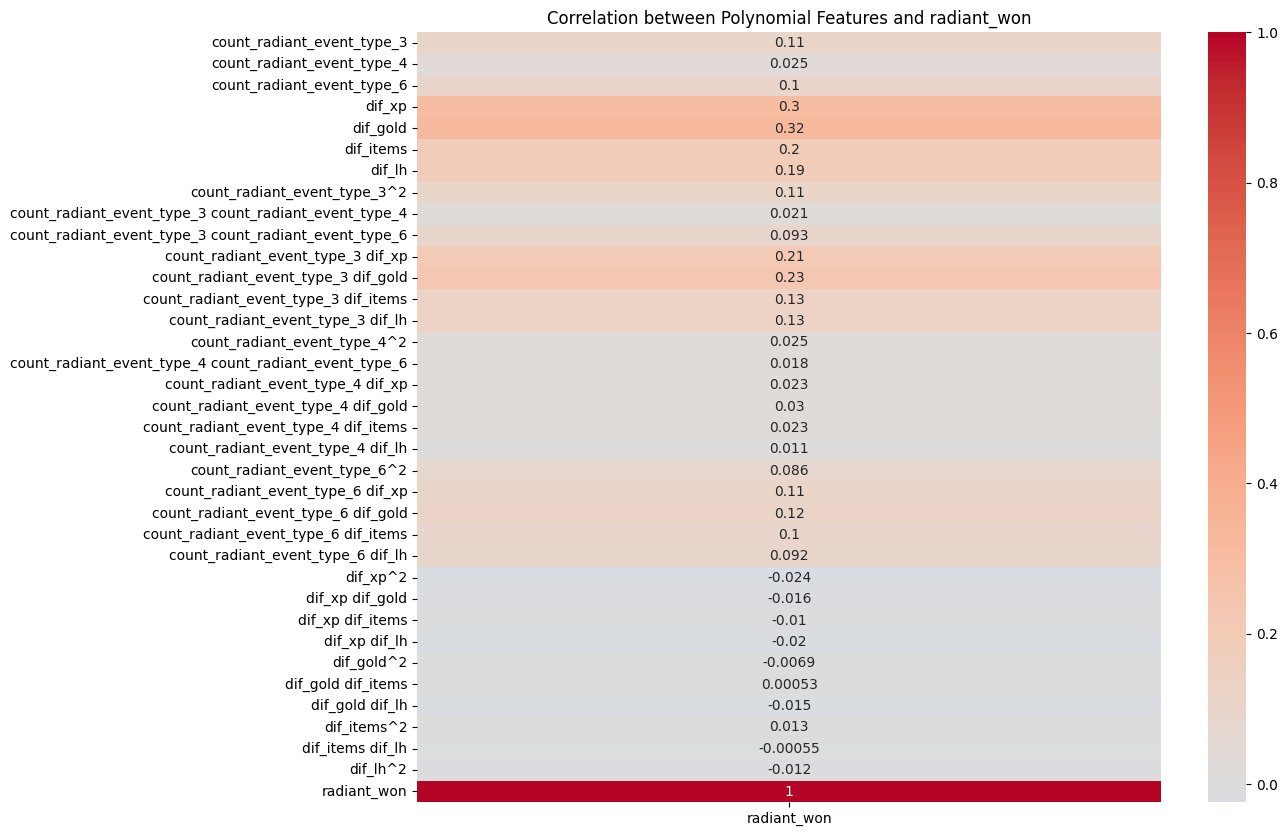

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt

# Разделим данные на признаки (X) и целевую переменную (y)
X = data_train.drop(['mid', 'radiant_won'], axis=1)
y = data_train['radiant_won']

# Создание полиномиальных признаков с заданной степенью (например, degree=2)
degree = 2  # Вы можете изменить степень
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Преобразуем X_poly в DataFrame и добавим названия признаков
poly_feature_names = poly.get_feature_names_out(input_features=X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Добавим целевую переменную radiant_won
X_poly_df['radiant_won'] = y.values

# Рассчитаем корреляцию полиномиальных признаков с целевой переменной
corr_matrix = X_poly_df.corr()

# Отобразим тепловую карту корреляций только для признаков и radiant_won
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['radiant_won']], annot=True, cmap='coolwarm', center=0)
plt.title("Correlation between Polynomial Features and radiant_won")
plt.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Разделим данные на признаки (X) и целевую переменную (y)
X = data_train.drop(['mid', 'radiant_won'], axis=1)
y = data_train['radiant_won']

# Создание полиномиальных признаков с заданной степенью (например, degree=2)
degree = 2  # Вы можете изменить степень
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Преобразуем X_poly в DataFrame и добавим названия признаков
poly_feature_names = poly.get_feature_names_out(input_features=X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Рассчитаем корреляцию полиномиальных признаков с целевой переменной
X_poly_df['radiant_won'] = y.values
corr_matrix = X_poly_df.corr()

# Отберем признаки с корреляцией выше порога (например, 0.09)
selected_features = corr_matrix.index[abs(corr_matrix['radiant_won']) > 0.09].tolist()
selected_features.remove('radiant_won')  # Удаляем целевую переменную из списка

# Отбираем только признаки с высокой корреляцией
X_selected_poly = X_poly_df[selected_features]

# Добавляем выбранные полиномиальные признаки к исходному DataFrame data_train
data_train_extended = pd.concat([data_train, X_selected_poly], axis=1)

# Выведем информацию о добавленных признаках
print(f"Добавлено {len(selected_features)} новых признаков.")
print(f"Новые признаки: {selected_features}")


Добавлено 16 новых признаков.
Новые признаки: ['count_radiant_event_type_3', 'count_radiant_event_type_6', 'dif_xp', 'dif_gold', 'dif_items', 'dif_lh', 'count_radiant_event_type_3^2', 'count_radiant_event_type_3 count_radiant_event_type_6', 'count_radiant_event_type_3 dif_xp', 'count_radiant_event_type_3 dif_gold', 'count_radiant_event_type_3 dif_items', 'count_radiant_event_type_3 dif_lh', 'count_radiant_event_type_6 dif_xp', 'count_radiant_event_type_6 dif_gold', 'count_radiant_event_type_6 dif_items', 'count_radiant_event_type_6 dif_lh']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Разделим данные на признаки (X) и целевую переменную (y)
X = data_train.drop(['radiant_won'], axis=1)
y = data_train['radiant_won']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Список моделей для перебора
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Перебор моделей и расчет метрики ROC AUC
for model_name, model in models.items():
    # Обучение модели
    model.fit(X_train, y_train)
    
    # Предсказание вероятностей для тестовой выборки
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятность для класса 1
    
    # Оценка ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{model_name}: ROC AUC = {roc_auc:.4f}")


Logistic Regression: ROC AUC = 1.0000
Random Forest: ROC AUC = 1.0000
Gradient Boosting: ROC AUC = 1.0000


In [11]:
data_train_extended

,mid,radiant_won,count_radiant_event_type_3,count_radiant_event_type_4,count_radiant_event_type_6,dif_xp,dif_gold,dif_items,dif_lh,count_radiant_event_type_3,...,count_radiant_event_type_3^2,count_radiant_event_type_3 count_radiant_event_type_6,count_radiant_event_type_3 dif_xp,count_radiant_event_type_3 dif_gold,count_radiant_event_type_3 dif_items,count_radiant_event_type_3 dif_lh,count_radiant_event_type_6 dif_xp,count_radiant_event_type_6 dif_gold,count_radiant_event_type_6 dif_items,count_radiant_event_type_6 dif_lh
0,0,1,1.0,0.0,0.0,3321,-8699,11.0,-282,1.0,...,1.0,0.0,3321.0,-8699.0,11.0,-282.0,0.0,-0.0,0.0,-0.0
1,1,0,1.0,0.0,0.0,-9463,-13238,-9.0,66,1.0,...,1.0,0.0,-9463.0,-13238.0,-9.0,66.0,-0.0,-0.0,-0.0,0.0
2,2,1,0.0,0.0,0.0,26753,25872,4.0,372,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,0.0,0.0,0.0,1268,-9886,-3.0,107,0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
4,5,1,0.0,0.0,0.0,-26388,-26481,-8.0,-110,0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24969,49939,0,1.0,0.0,1.0,17090,-4174,6.0,76,1.0,...,1.0,1.0,17090.0,-4174.0,6.0,76.0,17090.0,-4174.0,6.0,76.0
24970,49940,1,1.0,0.0,0.0,29838,56234,-6.0,213,1.0,...,1.0,0.0,29838.0,56234.0,-6.0,213.0,0.0,0.0,-0.0,0.0
24971,49941,1,0.0,0.0,0.0,3321,-8693,-2.0,297,0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
24972,49945,0,0.0,0.0,0.0,-436,-7607,-21.0,-126,0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [30]:
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Разделим данные на признаки (X) и целевую переменную (y)
X = data_train_extended.drop(['radiant_won','mid'], axis=1)
y = data_train_extended['radiant_won']
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Создаем пайплайн с масштабированием данных и SGDClassifier для логистической регрессии
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация признаков
    ('logreg', LogisticRegressionCV( max_iter=1000, tol=1e-3, random_state=42))  # Логистическая регрессия с SGD
])

# Обучение модели
pipeline.fit(X_train, y_train)

# Предсказания и оценка на тестовых данных
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

# Оценка модели с использованием метрики ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc}")


ROC AUC: 0.7087252332125511


<Axes: >

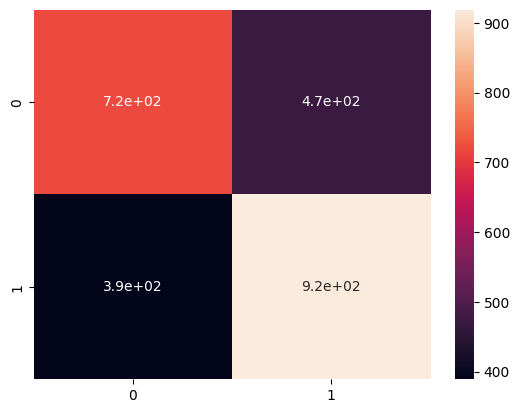

In [33]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

import seaborn as sns

sns.heatmap(cm,annot=True)

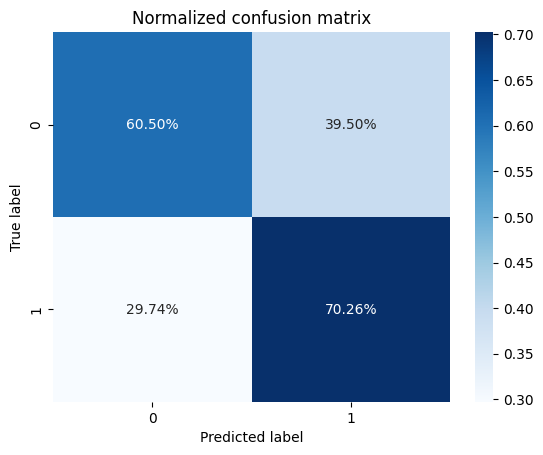

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2%')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized confusion matrix')
plt.show()
